# Project 4 Credit Card Clustering for Market Strategy

Anggota:
1. Muhammad Taufiqul Hakim
2. M. Dwi Pratama
3. Rossanda Sevia Gadis
4. Shafira Almaisa

# Latar Belakang

>Kartu kredit telah menjadi salah satu alat pembayaran yang paling populer dan umum digunakan di seluruh dunia. Penggunaan kartu kredit memainkan peran penting dalam kehidupan sehari-hari masyarakat modern, baik dalam transaksi online maupun offline.

>Salah satu manfaat penggunaan kartu kredit adalah kemudahan dan kenyamanannya. Kartu kredit memungkinkan pengguna untuk melakukan pembelian dengan mudah tanpa harus membawa uang tunai. Dengan hanya menggunakan kartu kredit, pengguna dapat melakukan transaksi di berbagai tempat seperti toko ritel, restoran, hotel, dan bahkan online. Kepraktisan ini membuat kartu kredit menjadi pilihan yang populer bagi banyak konsumen. Selain kemudahan, penggunaan kartu kredit juga memberikan keuntungan tambahan seperti perlindungan konsumen.

>Kartu kredit dapat mempengaruhi keputusan pembelian, pola pengeluaran, dan kecenderungan mengakumulasi utang. Oleh karena itu cukup penting untuk mengetahui perilaku dari penggunaan kartu kredit bagi kebutuhan marketing.
Oleh karena itu akan dilakukan analisis berupa klasterisasi untuk pengelompokan nasabah kartu kredit ke dalam beberapa kelompok sesuai dengan perilaku nasabah untuk mendapatkan strategi pemasaran kartu kredit yang efektif dan efisien.

# Data

>Data yang digunakan pada kasus ini adalah data **Credit Card** yang diambil dari Website Kaggle. Data memiliki feature sebagai berikut:

>1. `CUST_ID` - Identifikasi pemegang kartu kredit.
2. `BALANCE` - Jumlah saldo yang tersisa untuk melakukan pembelian.
3. `BALANCE_FREQUENCY` - Seberapa sering saldo diperbarui
    - 0: tidak sering diupdate
    - 1: sering diupdate
4. `PURCHASES` - Jumlah pembelian yang dilakukan dari akun
5. `ONEOFF_PURCHASES` - Jumlah maksimum pembelian yang dilakukan dalam sekali transaksi
6. `INSTALLMENTS_PURCHASES` - Jumlah pembelian yang dilakukan secara cicilan
7. `CASH_ADVANCE` - Uang muka yang diberikan oleh pengguna
8. `PURCHASES_FREQUENCY` - Seberapa sering pembelian dilakukan
    - 0: tidak sering melakukan pembelian
    - 1: sering melakukan pembelian
9. `ONEOFFPURCHASESFREQUENCY`- Seberapa sering Pembelian dilakukan dalam sekali transaksi.
    - 0: tidak sering melakukan pembelian
    - 1: sering melakukan pembelian
10. `PURCHASESINSTALLMENTSFREQUENCY` - Seberapa sering pembelian dengan cicilan dilakukan.
    - 0: tidak sering dilakukan
    - 1: sering dilakukan
11. `CASHADVANCEFREQUENCY` - Seberapa sering uang muka yang dibayarkan.
12. `CASHADVANCETRX` - Jumlah transaksi yang dilakukan dengan "Tunai di Muka."
13. `PURCHASES_TRX` - Jumlah transaksi pembelian yang dilakukan.
14. ` CREDIT_LIMIT` -  Limit Kartu Kredit yang dimiliki oleh pengguna.
15. `PAYMENTS` - Jumlah Pembayaran yang dilakukan oleh pengguna.
16. `MINIMUM_PAYMENTS` - Jumlah minimum pembayaran yang dilakukan oleh pengguna.
17. `PRCFULLPAYMENT` - Persentase pembayaran penuh yang dibayarkan oleh pengguna.
18. `TENURE` - Lama penggunaan kartu kredit oleh pengguna.

# Capaian

>Menggunakan data ini, akan dibangun sebuah model klasterisasi dimana digunakan data feature dan data label(target variabel) untuk melatih model untuk klasterisasi pengelompokan nasabah kartu kredit ke dalam beberapa kelompok sesuai dengan perilaku nasabah untuk mendapatkan strategi pemasaran kartu kredit yang efektif dan efisien.

# Import Pustaka

Dilakukan proses import pustaka dimana akan diakses beberapa fungsi di dalamnya yang akan digunakan untuk keperluan membangun model klastering ini.

In [1]:
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.decomposition import PCA

# building model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

# model evaluation
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
#! pip install -q kaggle
#! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
#! chmod 600 ~/.kaggle/kaggle.json

In [3]:
#! kaggle datasets download -d arjunbhasin2013/ccdata

In [4]:
#!unzip ccdata.zip

Kode diatas diraw dan dapat digunakan apabila menggunakan kaggle untuk melakukan importing dataset.

In [5]:
#read data

df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Dilakukan proses untuk mengubah nama kolom menjadi lowercase untuk memudahkan dalam menganalisis dengan fungsi `map(str.lower, df.columns)`

In [6]:
df.columns = map(str.lower, df.columns)

In [7]:
df

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Dilakukan proses rename kolom untuk mempermudah proses analisis.
- kolom `balance_frequency` di rename dengan nama `balance_freq`
- kolom `installments_purchases` di rename dengan nama `instmnts_purchases`
- kolom `cash_advance` di rename dengan nama `cash_adv`
- kolom `purchases_frequency` di rename dengan nama `purchases_freq`
- kolom `oneoff_purchases_frequency` di rename dengan nama `oneoff_purchases_freq`
- kolom `purchases_installments_frequency` di rename dengan nama `purchases_instmnts_freq`
- kolom `cash_advance_frequency` di rename dengan nama `cash_adv_freq`
- kolom `cash_advance_trx` di rename dengan nama `cash_adv_trx`
- kolom `minimum_payments` di rename dengan nama `min_payments`


In [8]:
df.rename(columns= {"balance_frequency":"balance_freq","installments_purchases":"instmnts_purchases","cash_advance":"cash_adv","purchases_frequency":"purchases_freq","oneoff_purchases_frequency":"oneoff_purchases_freq","purchases_installments_frequency":"purchases_instmnts_freq","cash_advance_frequency":"cash_adv_freq","cash_advance_trx":"cash_adv_trx","minimum_payments":"min_payments"}, inplace = True)

In [9]:
df

,cust_id,balance,balance_freq,purchases,oneoff_purchases,instmnts_purchases,cash_adv,purchases_freq,oneoff_purchases_freq,purchases_instmnts_freq,cash_adv_freq,cash_adv_trx,purchases_trx,credit_limit,payments,min_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
df.shape

(8950, 18)

Berdasarkan output, dapat diketahui bahwa terdapat 8.950 baris data dan 18 kolom pada dataset yang digunakan.

Informasi yang terdapat pada dataset seperti nama kolom, informasi jumlah data non-null pada masing-masing kolom dan juga tipe data dapat diketahui dengan menggunakan fungsi `.info()`

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cust_id                  8950 non-null   object 
 1   balance                  8950 non-null   float64
 2   balance_freq             8950 non-null   float64
 3   purchases                8950 non-null   float64
 4   oneoff_purchases         8950 non-null   float64
 5   instmnts_purchases       8950 non-null   float64
 6   cash_adv                 8950 non-null   float64
 7   purchases_freq           8950 non-null   float64
 8   oneoff_purchases_freq    8950 non-null   float64
 9   purchases_instmnts_freq  8950 non-null   float64
 10  cash_adv_freq            8950 non-null   float64
 11  cash_adv_trx             8950 non-null   int64  
 12  purchases_trx            8950 non-null   int64  
 13  credit_limit             8949 non-null   float64
 14  payments                

# Data Cleaning

Dilakukan drop pada kolom `cust_id` menggunakan fungsi `.drop` pada dataset

In [12]:
df = df.drop(columns='cust_id')

In [13]:
df

,balance,balance_freq,purchases,oneoff_purchases,instmnts_purchases,cash_adv,purchases_freq,oneoff_purchases_freq,purchases_instmnts_freq,cash_adv_freq,cash_adv_trx,purchases_trx,credit_limit,payments,min_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Kemudian untuk mengetahui hubungan atau korelasi antar kolom pada data dapat diketahui menggunakan fungsi `.corr`

In [14]:
df.corr()

,balance,balance_freq,purchases,oneoff_purchases,instmnts_purchases,cash_adv,purchases_freq,oneoff_purchases_freq,purchases_instmnts_freq,cash_adv_freq,cash_adv_trx,purchases_trx,credit_limit,payments,min_payments,prc_full_payment,tenure
balance,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
balance_freq,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
purchases,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
oneoff_purchases,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
instmnts_purchases,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
cash_adv,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
purchases_freq,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
oneoff_purchases_freq,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
purchases_instmnts_freq,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
cash_adv_freq,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


Menggunakan fungsi `.corr()`, untuk meelihat korelasi atau hubungan antara kolom apakah terdapat kolom yang saling terkait terhadap kenaikan atau penurunan valuenya.

Dengan fungsi ini juga dapat diperiksa apakah terdapat kolom dengan data yang sama atau tidak, jika terdapat yang sama maka dapat dihapus.





Untuk melakukan pengecekkan terhadap nilai null dapat dilakukan menggunakan fungsi `.isna().sum()`

In [15]:
df.isna().sum()

balance                      0
balance_freq                 0
purchases                    0
oneoff_purchases             0
instmnts_purchases           0
cash_adv                     0
purchases_freq               0
oneoff_purchases_freq        0
purchases_instmnts_freq      0
cash_adv_freq                0
cash_adv_trx                 0
purchases_trx                0
credit_limit                 1
payments                     0
min_payments               313
prc_full_payment             0
tenure                       0
dtype: int64

Untuk melakukan pengecekan terhadap nilai yang mungkin memiliki duplikat dapat dilakukan menggunakan fungsi `.duplicated().sum()`

In [16]:
df.duplicated().sum()

0

Tidak ada data duplikat pada dataset.

In [17]:
# mencari value error pada kolom balance
for row in df['balance']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['balance'] = np.nan

# mencari value error pada kolom balance_freq
for row in df['balance_freq']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['balance_freq'] = np.nan

# mencari value error pada kolom purchases
for row in df['purchases']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['purchases'] = np.nan

# mencari value error pada kolom one_off_purchases
for row in df['oneoff_purchases']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['oneoff_purchases'] = np.nan

# mencari value error pada kolom instmnts_puchases
for row in df['instmnts_purchases']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['instmnts_purchases'] = np.nan

# mencari value error pada kolom cash_adv
for row in df['cash_adv']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['cash_adv'] = np.nan

# mencari value error pada kolom purchases_freq
for row in df['purchases_freq']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['purchases_freq'] = np.nan

# mencari value error pada kolom oneoff_purchases_freq
for row in df['oneoff_purchases_freq']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['oneoff_purchases_freq'] = np.nan

# mencari value error pada kolom purchases_instmnts_freq
for row in df['purchases_instmnts_freq']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['purchases_instmnts_freq'] = np.nan

# mencari value error pada kolom cash_adv_freq
for row in df['cash_adv_freq']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['cash_adv_freq'] = np.nan

# mencari value error pada cash_adv_trx
for row in df['cash_adv_trx']:
    try:
        int(row)
        pass
    except ValueError:
        df.loc['cash_adv_trx'] = np.nan

# mencari value error pada purchases_trx
for row in df['purchases_trx']:
    try:
        int(row)
        pass
    except ValueError:
        df.loc['purchases_trx'] = np.nan

# mencari value error pada kolom credit_limit
for row in df['credit_limit']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['credit_limit'] = np.nan

# mencari value error pada kolom payments
for row in df['payments']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['payments'] = np.nan

# mencari value error pada kolom min_payments
for row in df['min_payments']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['min_payments'] = np.nan

# mencari value error pada kolom prc_full_payments
for row in df['prc_full_payment']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc['prc_full_payment'] = np.nan

# mencari value error pada kolom tenure
for row in df['tenure']:
    try:
        int(row)
        pass
    except ValueError:
        df.loc['tenure'] = np.nan

Dengan kode diatas dilakukan pengecekkan pada masing-masing kolom untuk mengetahui dan mencari value error ataupun missing value pada masing-masing kolom.

In [18]:
df.isna().sum()

balance                      0
balance_freq                 0
purchases                    0
oneoff_purchases             0
instmnts_purchases           0
cash_adv                     0
purchases_freq               0
oneoff_purchases_freq        0
purchases_instmnts_freq      0
cash_adv_freq                0
cash_adv_trx                 0
purchases_trx                0
credit_limit                 1
payments                     0
min_payments               313
prc_full_payment             0
tenure                       0
dtype: int64

Setelah dilakukan pengecekkan value error, kemudian dicek kembali jumlah data null pada masing-masing kolom menggunakan fungsi `isna().sum()`.

In [19]:
# melihat persen data null masing-masing kolom dari keseluruhan data
percent_missing = (df.isnull().sum() / len(df)) * 100/100
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
balance,0.000000
balance_freq,0.000000
purchases,0.000000
oneoff_purchases,0.000000
instmnts_purchases,0.000000
cash_adv,0.000000
purchases_freq,0.000000
oneoff_purchases_freq,0.000000
purchases_instmnts_freq,0.000000
cash_adv_freq,0.000000


Menggunakan kode diatas untuk menghitung jumlah persentase dari data null pada masing-masing kolom untuk membandingkan jumlahnya dari keseluruhan data.

Dari hasil perhitungan persentase pada missing value, diketahui terdapat missing value pada kolom **credit_limit** sebesar 1 missing value atau 0,01 % dan pada kolom **min_payments** sebesar 313 missing values atau 3,5 % dari total data pada kolom dan diputuskan untuk menghapus data null/missing values dikarenakan jumlahnya yang sedikit dan dianggap tidak memberikan dampak yang besar pada proses membangun model nantinya.


In [20]:
# Menghapus missing value
df.dropna(inplace=True)

Menggunakan `.dropna()` dilakukan penghapusan nilai NaN dengan parameter axis defaultnya adalah 0. Setelah dilakukan drop pada missing values, jumlah data akan menjadi berkurang.

In [21]:
df.isna().sum()

balance                    0
balance_freq               0
purchases                  0
oneoff_purchases           0
instmnts_purchases         0
cash_adv                   0
purchases_freq             0
oneoff_purchases_freq      0
purchases_instmnts_freq    0
cash_adv_freq              0
cash_adv_trx               0
purchases_trx              0
credit_limit               0
payments                   0
min_payments               0
prc_full_payment           0
tenure                     0
dtype: int64

Setelah diperiksa kembali, dapat disimpulkan bahwa data telah bersih dari missing value ataupun data null.

# Eksplorasi Data (EDA)

In [22]:
df.nunique()

balance                    8631
balance_freq                 42
purchases                  6015
oneoff_purchases           3922
instmnts_purchases         4341
cash_adv                   4206
purchases_freq               47
oneoff_purchases_freq        47
purchases_instmnts_freq      47
cash_adv_freq                54
cash_adv_trx                 65
purchases_trx               173
credit_limit                203
payments                   8636
min_payments               8635
prc_full_payment             47
tenure                        7
dtype: int64

melihat nilai unik pada setiap tabel untuk melakukan pemilahan analisis visual terhadap data

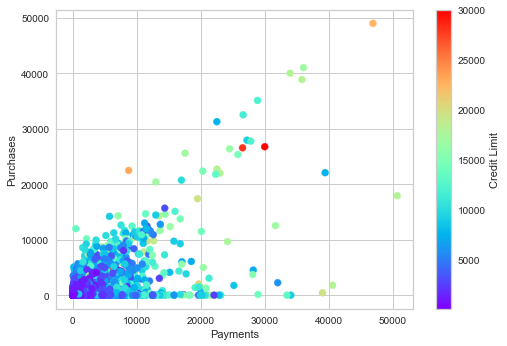

In [23]:
plt.scatter(df['payments'],df['purchases'], c=df['credit_limit'],cmap='rainbow')
plt.xlabel('Payments')
plt.ylabel('Purchases')
plt.colorbar(label='Credit Limit')
plt.show()

Dari plot tersebut ditunjukkan semakin besar Jumlah Pembelian semakin besar pula jumlah pembayaran. Terlihat juga dari credit limit bahwa semakin besar jumlah pembelian dan pembayaran semakin besar pula credit limit dari akun tersebut.

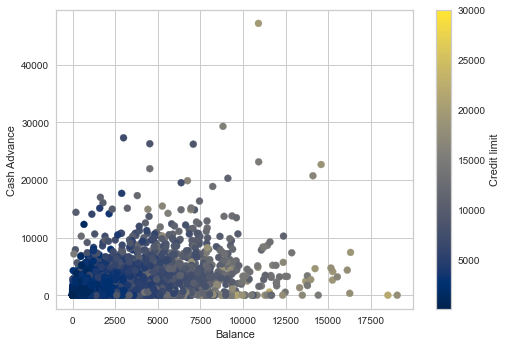

In [24]:
plt.scatter(df['balance'],df['cash_adv'], c=df['credit_limit'],cmap='cividis')
plt.xlabel('Balance')
plt.ylabel('Cash Advance')
plt.colorbar(label='Credit limit')
plt.show()

Dari plot tersebut ditunjukkan bahwa Uang muka yang diberikan oleh pengguna dalam suatu transaksi pembelian akan mengakibatkan Saldo kartu kredit tidak berkurang atau tetap, Namun jika Uang muka tidak diberikan apabila saldo tersebut masih banyak, maka bisa dipastikan karena limit kredit yang cukup besar, sesuai dengan plot yang ditunjukkan.
Dari plot tersebut juga bisa dikatakan bahwa, Banyaknya Saldo sesuai dengan besarnya limit kartu kredit.

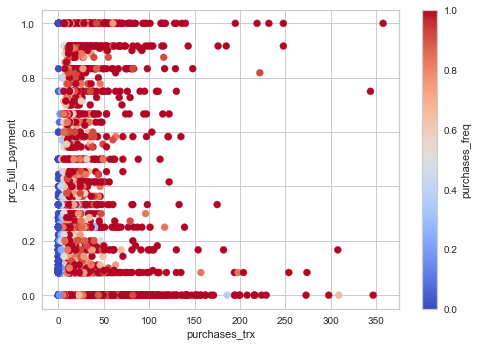

In [25]:
plt.scatter(df['purchases_trx'],df['prc_full_payment'], c=df['purchases_freq'],cmap='coolwarm')
plt.xlabel('purchases_trx')
plt.ylabel('prc_full_payment')
plt.colorbar(label='purchases_freq')
plt.show()

Jumlah transaksi pembelian yang dilakukan **purchases_trx** semakin banyak seiring dengan frekuensi pembelian yang dilakukan **purchases_freq**, namun tidak memiliki hubungan terhadap persentase pembayaran penuh dalam tiap transaksi **prc_full_payment**.

Pada plot tersebut, secara tidak langsung berarti terdapat cukup banyak pengguna yang melakukan pembelian **purchases freq** dengan pembayaran cicilan atau tidak membayar secara penuh berdasarkan **prc_full_payment**. Serta terdapat cukup banyak juga pembelian yang dilakukan dengan membayar secara penuh.

Menampilkan informasi statistik deskriptif secara umum yang berisi ringkasan informasi penting seperti jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil pertama (25%), median (50%), kuartil ketiga (75%), dan nilai maksimum (max) dari kolom **balance,	balance_freq,	purchases,	oneoff_purchases,	instmnts_purchases,	cash_adv,	purchases_freq,	oneoff_purchases_freq,	purchases_instmnts_freq,	cash_adv_freq,	cash_adv_trx,	purchases_trx,	credit_limit,	payments,	min_payments,	prc_full_payment,** dan **tenure**

In [26]:
df.describe()

,balance,balance_freq,purchases,oneoff_purchases,instmnts_purchases,cash_adv,purchases_freq,oneoff_purchases_freq,purchases_instmnts_freq,cash_adv_freq,cash_adv_trx,purchases_trx,credit_limit,payments,min_payments,prc_full_payment,tenure
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Membuat suatu function **diagnostic_plots** untuk menampilkan distribusi data kolom dengan subplot Histogram dan Boxplot

In [27]:
def diagnostic_plots(df,variable):
    plt.figure(figsize=(16,4))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[variable],bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

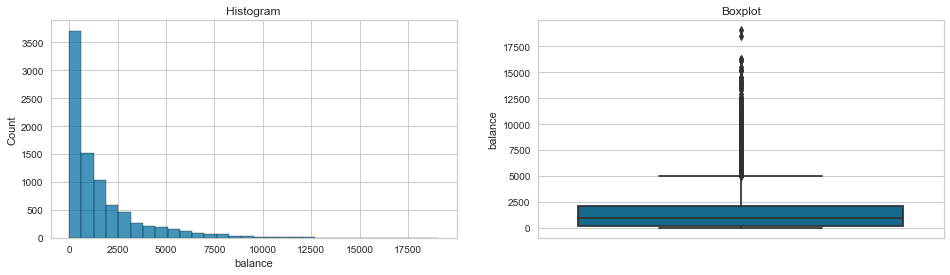

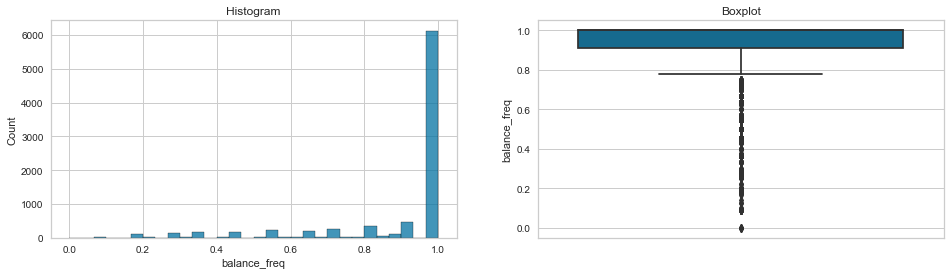

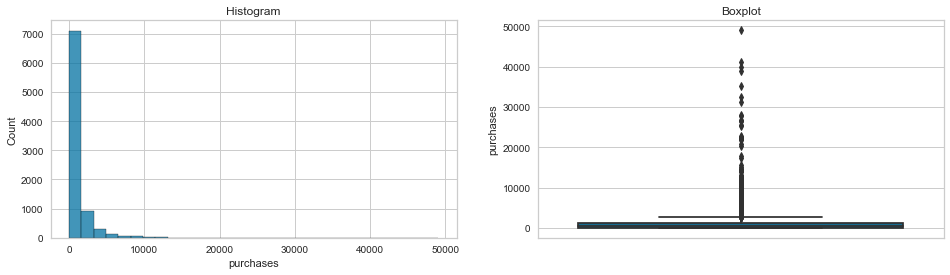

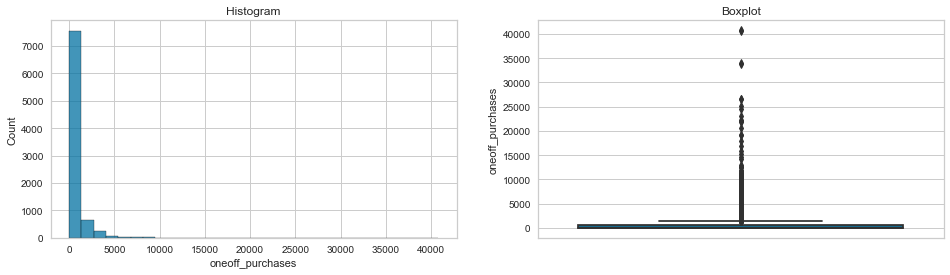

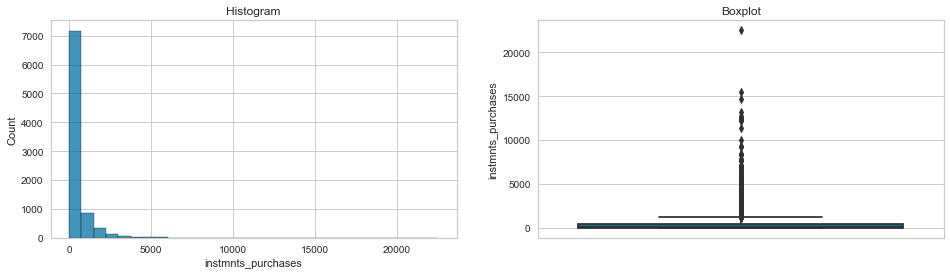

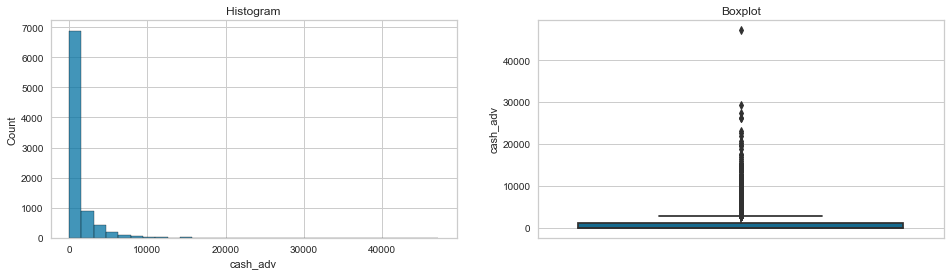

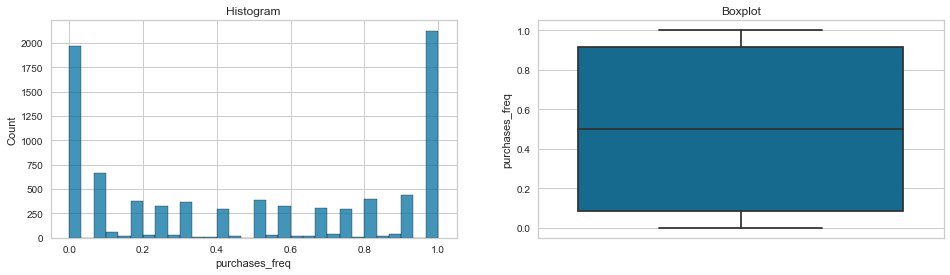

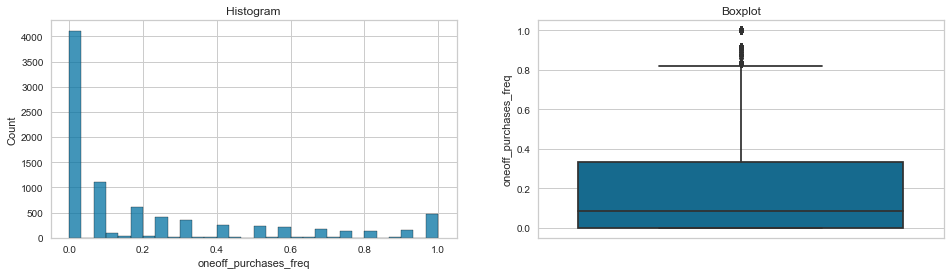

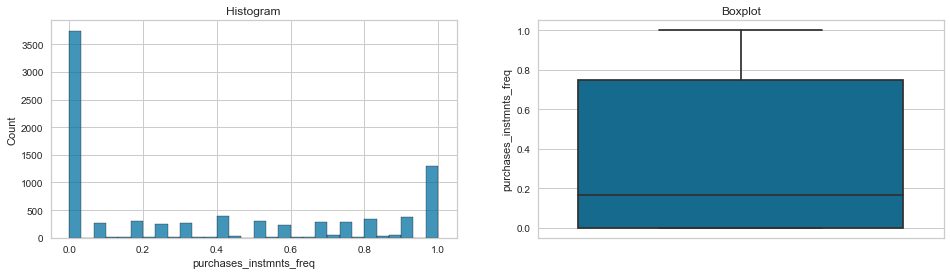

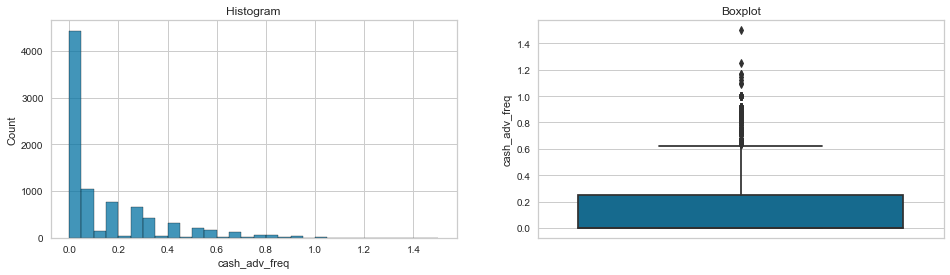

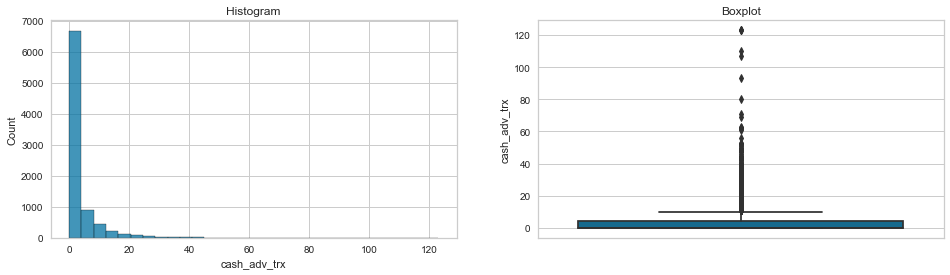

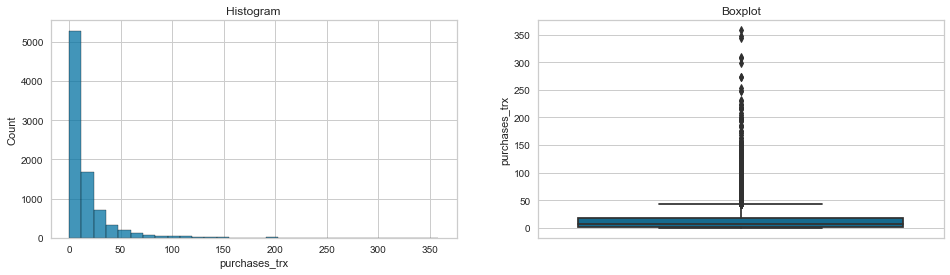

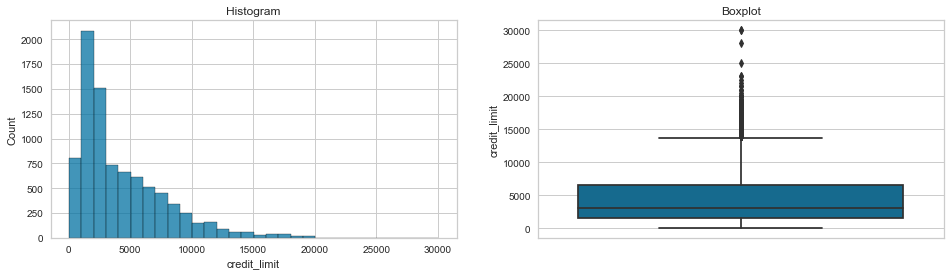

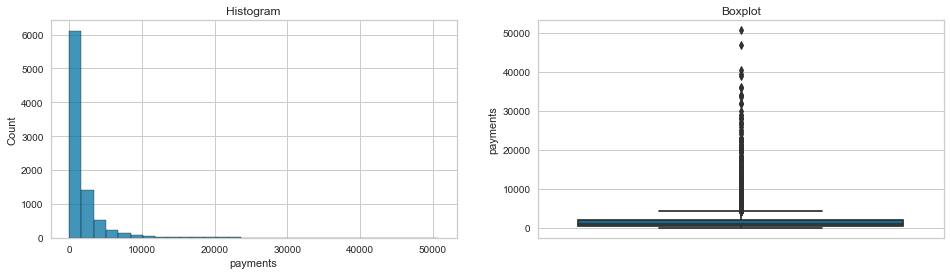

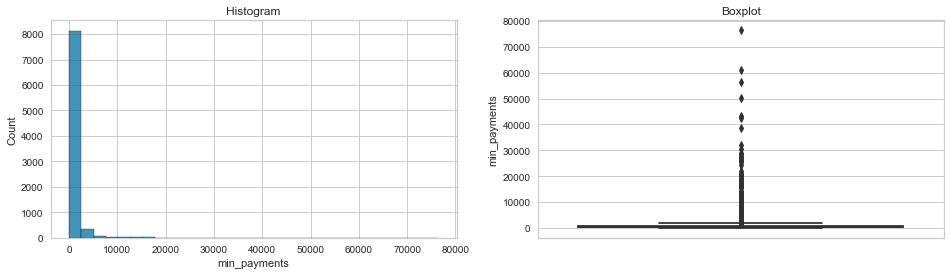

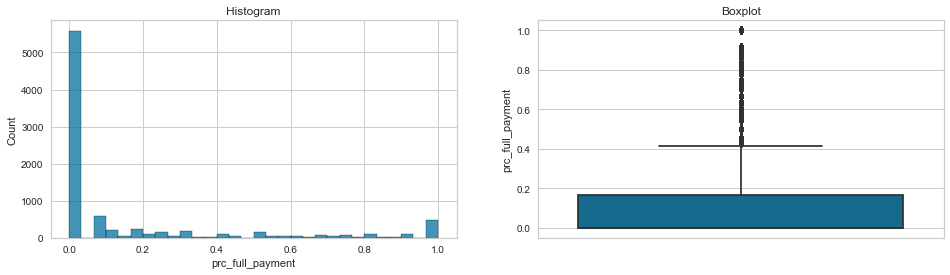

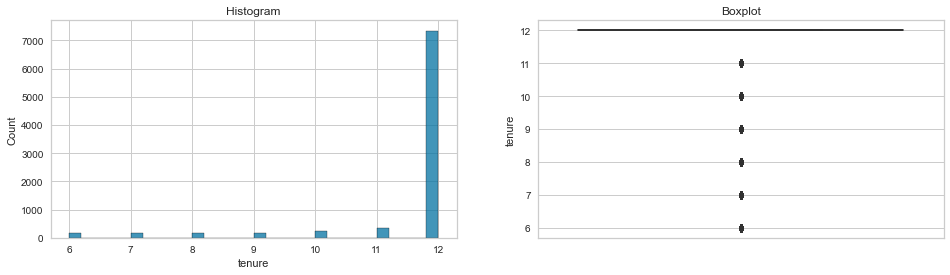

In [28]:
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        diagnostic_plots(df, col)
plt.show()

Berdasarkan plot histogram dan box plot yang menggambarkan bagaiaman data tiap kolom terdistribusi. diketahui bahwa hampir semua kolom memiliki cukup banyak nilai outliers kecuali pada kolom purchases_freq	dan purchases_instmnts_freq.
Dari plot diatas didapatkan bahwa:
1. Kolom dengan Zero Skewness: **purchases_freq** dan **purchases_instmnts_freq**.
2. Kolom dengan Positif Skewness: **balance, purchases, oneoff_purchases, instmnts_purchases, cash_adv, oneoff_purchases_freq, cash_adv_freq, cash_adv_trx, purchases_trx, credit_limit, payments, min_payments,** dan **prc_full_payments**.
3. Kolom dengan Negatif Skewness: **balance_freq** dan **tenure**

In [29]:
## Membuat fungsi untuk menampilkan nilai skew dengan penulisan yang lebih rapih
def print_skewness(dataframe):
    max_column_width = max(len(str(column)) for column in dataframe.columns)  # Menghitung lebar maksimum kolom
    for column in dataframe.columns:
        skew_value = dataframe[column].skew()
        column_width = len(str(column))
        print("Skewness dari kolom {}{}:{:}".format(column, " "*(max_column_width - column_width + 2), skew_value))

# Memanggil fungsi untuk mencetak nilai skewness
print_skewness(df)

Skewness dari kolom balance                  :2.3742541668073507
Skewness dari kolom balance_freq             :-2.0841614822186645
Skewness dari kolom purchases                :8.055789007455493
Skewness dari kolom oneoff_purchases         :9.935775932966443
Skewness dari kolom instmnts_purchases       :7.216133308729194
Skewness dari kolom cash_adv                 :5.13962856566708
Skewness dari kolom purchases_freq           :0.03304121629361683
Skewness dari kolom oneoff_purchases_freq    :1.5042342334651355
Skewness dari kolom purchases_instmnts_freq  :0.48775295432449595
Skewness dari kolom cash_adv_freq            :1.7959150389505736
Skewness dari kolom cash_adv_trx             :5.673326830236882
Skewness dari kolom purchases_trx            :4.578418450576066
Skewness dari kolom credit_limit             :1.5070190408804254
Skewness dari kolom payments                 :5.873048586774976
Skewness dari kolom min_payments             :13.622193089492013
Skewness dari kolom prc_full_p

Berdasarkan data skewness diperoleh hasil:
1. Kolom **purchases_freq** dan **purchases_instmnts_freq** cenderung simetris karena koefisien skewnessnya mendekati nol.
2. Kolom **balance, purchases, oneoff_purchases, instmnts_purchases, cash_adv, cash_adv_trx, purchases_trx, payments,** dan **min_payments,** positif skewness karena nilainya lebih besar dari 0 dan bahkan nilai skewness nya lebih besar dari 2. **oneoff_purchases_freq, cash_adv_freq, credit_limit,** dan **prc_full_payments** juga positif skewness tetapi dengan nilai lebih kecil dari 2.
3. Kolom **balance_freq** dan **tenure** adalah negatif skew dengan nilai skewness lebih kecil dari -2.

<AxesSubplot:>

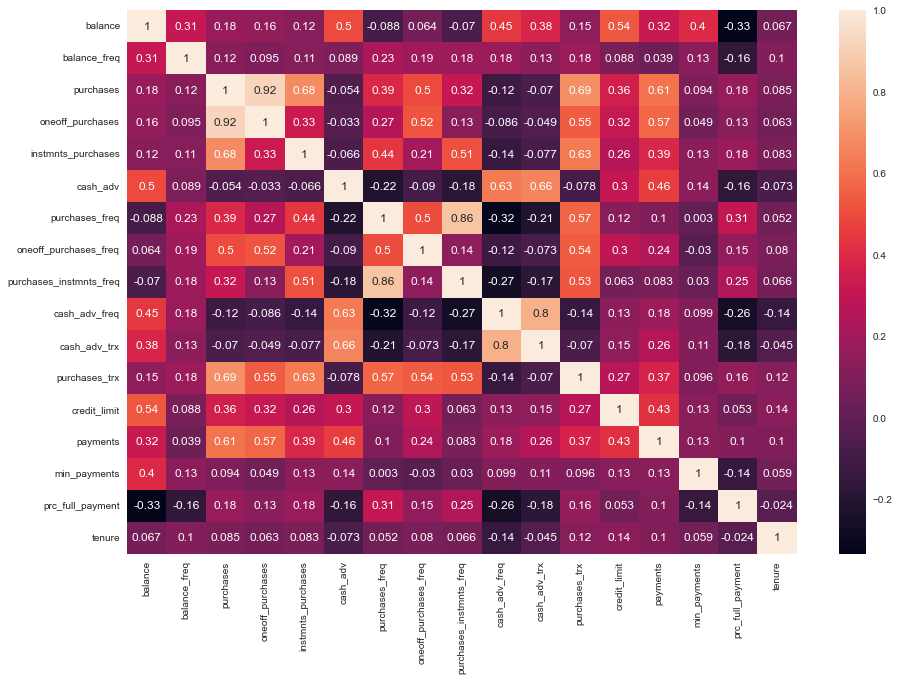

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

Berdasarkan plot heatmap, ada kumpulan kolom yang saling memiliki korelasi tinggi yaitu balance, purchases, oneoff_purchases, instmnts_purchases, cash_adv, purchases_freq, oneoff_purchases_freq, purchases_instmnts_freq, cash_adv_freq, cash_adv_trx, purchases_trx, credit_limit, payments, dan prc_full_payment. Sedangkan pada kolom balance_freq, min_payments, dan tenure tidak memberikan korelasi yang cukup signifikan terhadap kolom lainnya.

Karena pada data tersebut terdapat sangat banyak sekali data outliers, kita mencoba melakukan upaya penghilangan terhadap data outliers tersebut melalui metode Interquartile Range.

In [31]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

for cols in df.columns:
  df = remove_outliers_iqr(df, cols)


mendifinisikan fungsi remove_outliers_iqr atau menghapus outliers menggunakan metode interquartile range. kemudian memanggil fungsi tersebut untuk setiap kolom pada DataFrame.

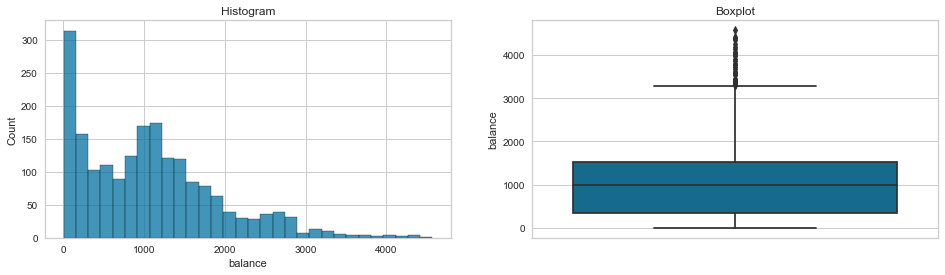

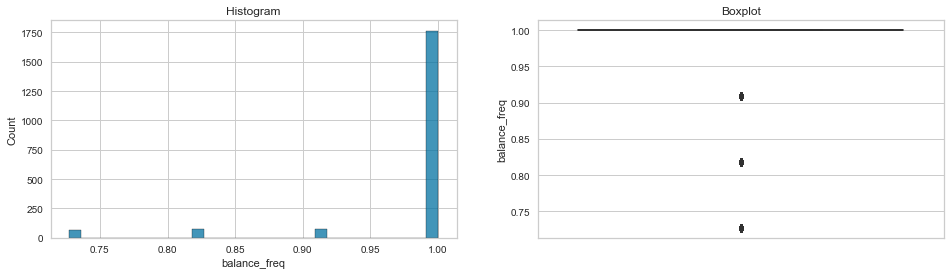

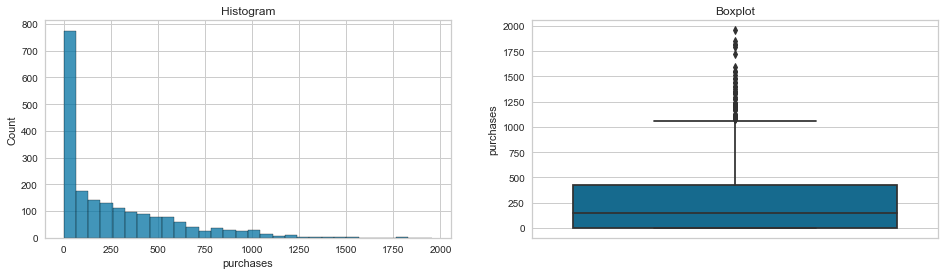

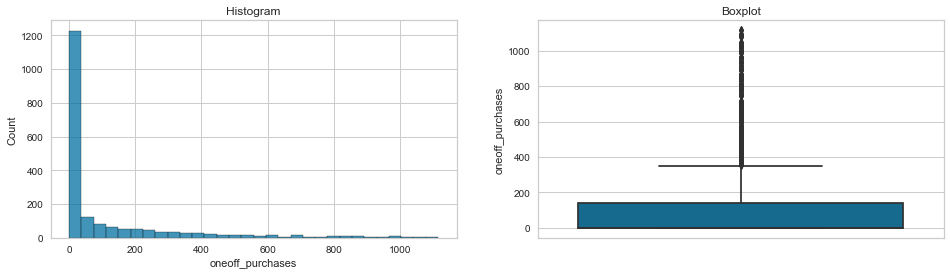

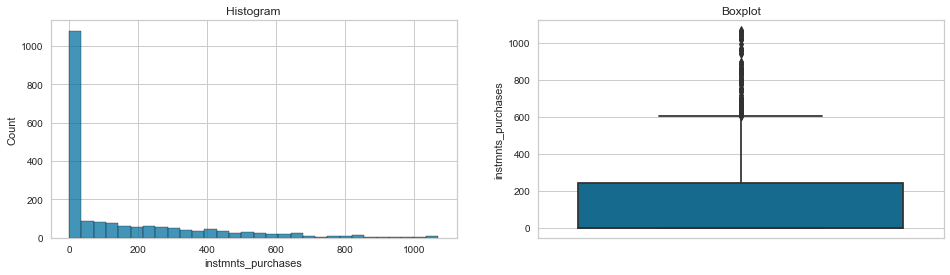

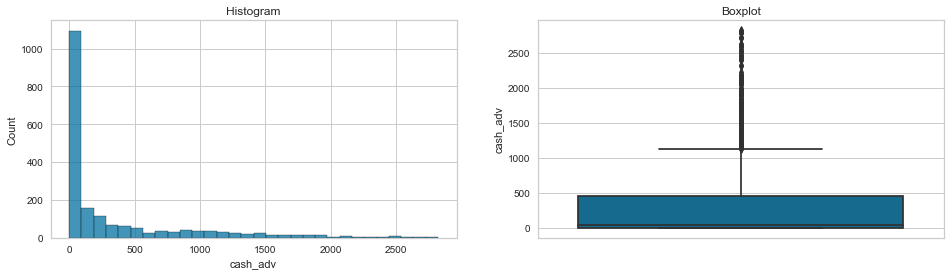

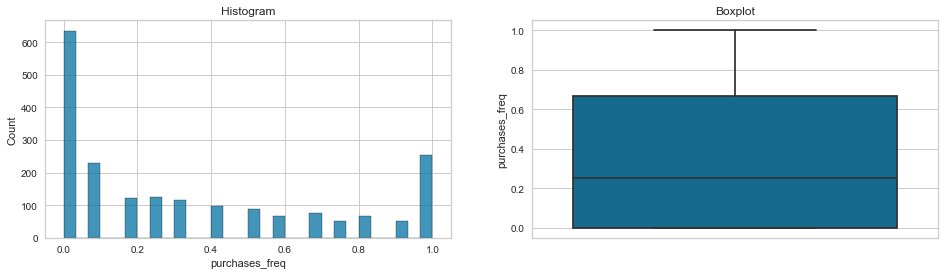

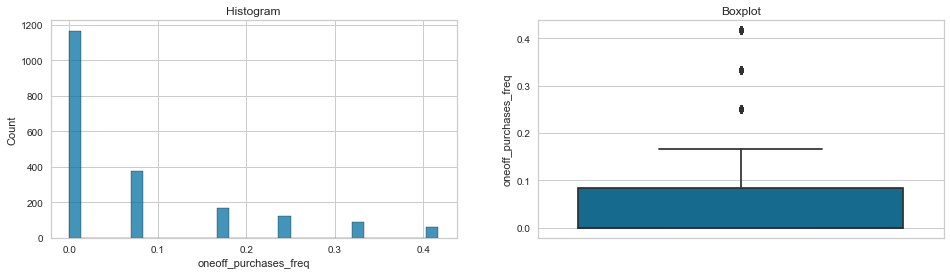

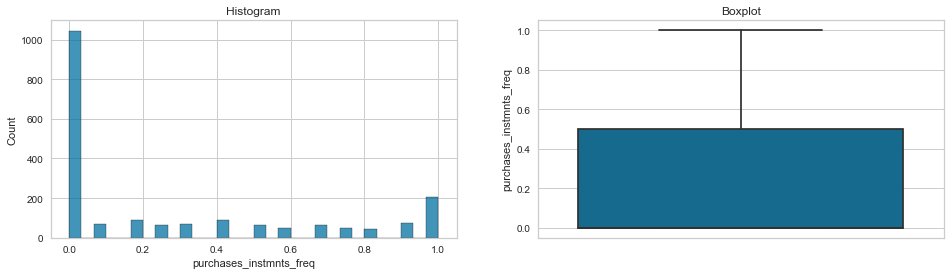

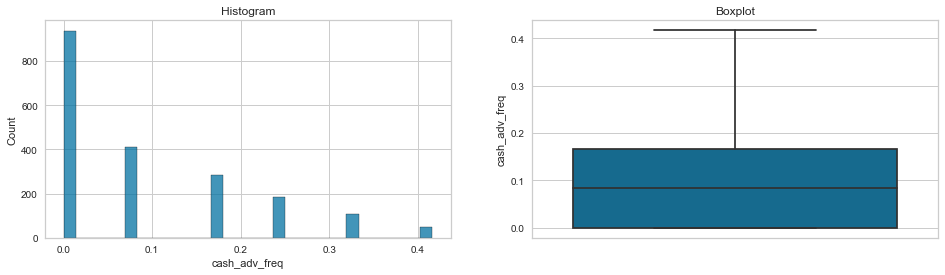

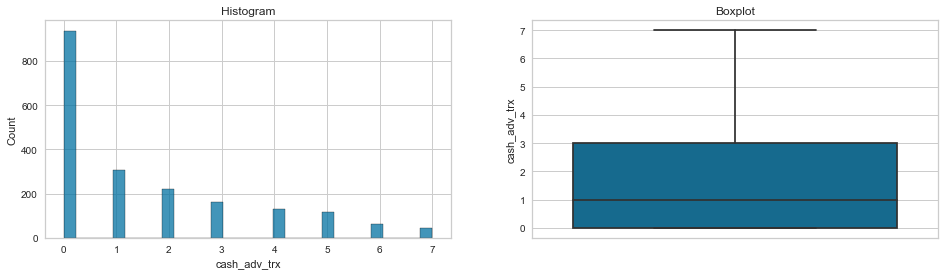

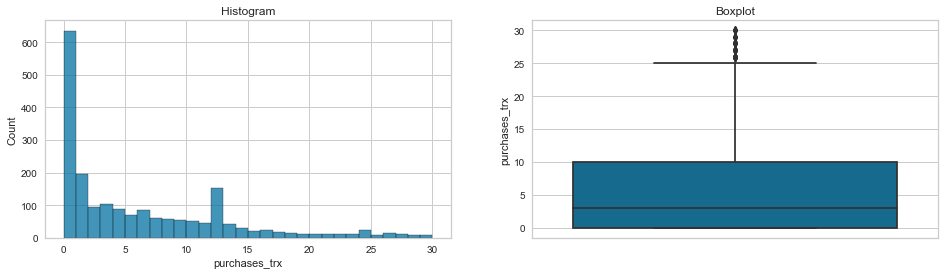

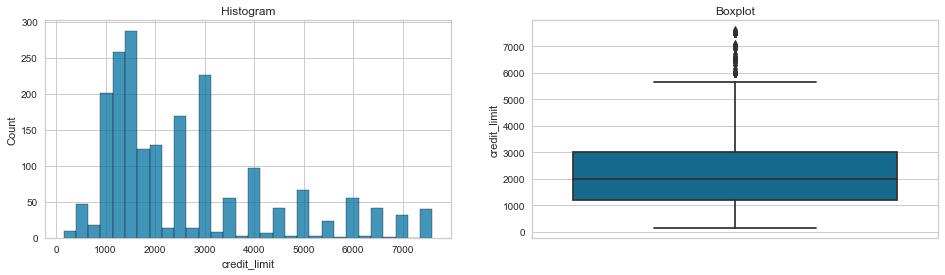

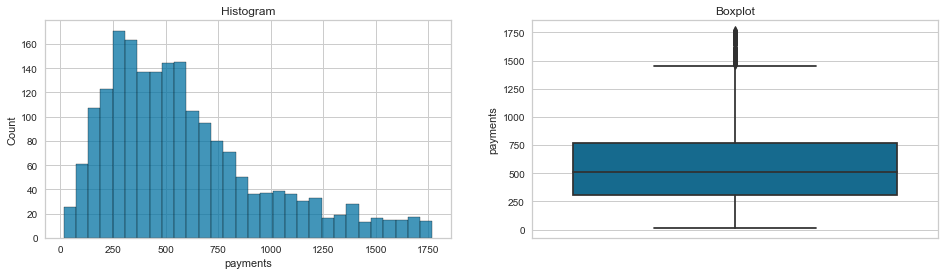

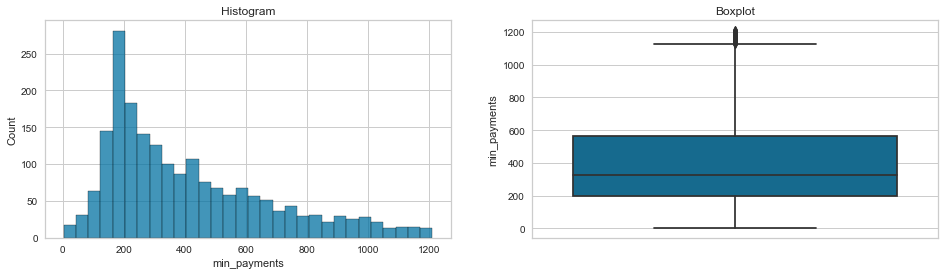

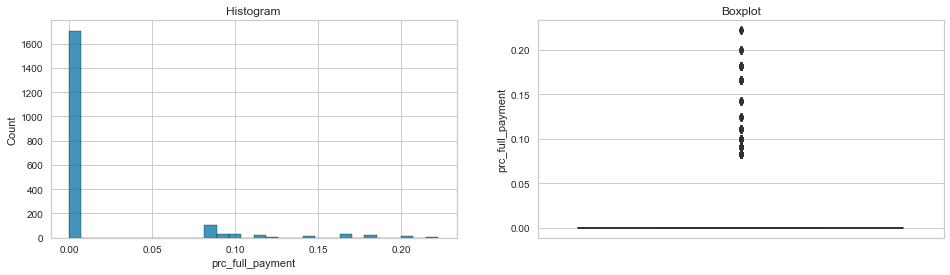

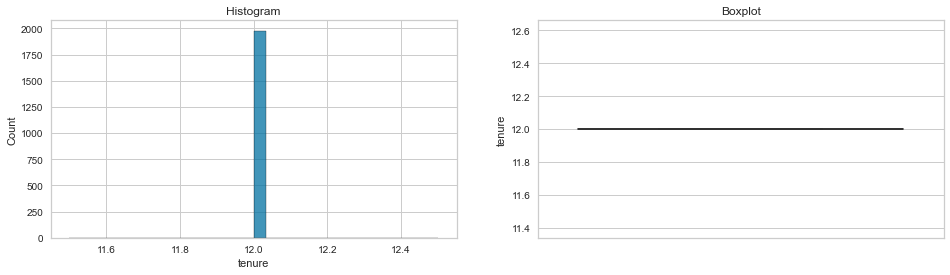

In [32]:
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        diagnostic_plots(df, col)
plt.show()

Berdasarkan plot histogram dan box plot dari hasil penghapusan outliers menggunakan interquartile range  menggambarkan bagaiamana data tiap kolom terdistribusi. Diketahui bahwa hampir semua kolom memiliki cukup banyak nilai outliers kecuali pada **purchases_freq, purchases_instmnts_freq, cash_adv_freq, cash_adv_trx** dan **tenure**

Dari plot diatas didapatkan bahwa:
1. Kolom dengan Zero Skewness: **purchases_freq, purchases_instmnts_freq, cash_adv_freq, cash_adv_trx** dan **tenure**.
2. Kolom dengan Positif Skewness: **balance, purchases, oneoff_purchases, instmnts_purchases, cash_adv, oneoff_purchases_freq, purchases_trx, credit_limit, payments, min_payments,** dan **prc_full_payments**.
3. Kolom dengan Negatif Skewness: **balance_freq**

In [33]:
# Memanggil fungsi untuk mencetak nilai skewness
print_skewness(df)

Skewness dari kolom balance                  :0.943843727099893
Skewness dari kolom balance_freq             :-3.2092326502512827
Skewness dari kolom purchases                :1.5425771392783594
Skewness dari kolom oneoff_purchases         :2.3555930065148423
Skewness dari kolom instmnts_purchases       :1.719249073526289
Skewness dari kolom cash_adv                 :1.9744065126041803
Skewness dari kolom purchases_freq           :0.7029651564627333
Skewness dari kolom oneoff_purchases_freq    :1.591113740636394
Skewness dari kolom purchases_instmnts_freq  :0.9630403030350713
Skewness dari kolom cash_adv_freq            :1.1032035161039409
Skewness dari kolom cash_adv_trx             :1.1665280178675403
Skewness dari kolom purchases_trx            :1.2941067842856186
Skewness dari kolom credit_limit             :1.230368642617385
Skewness dari kolom payments                 :1.061222405369534
Skewness dari kolom min_payments             :1.0067857055870593
Skewness dari kolom prc_full_

Berdasarkan data skewness diperoleh hasil:
1. Kolom **balance, purchases_freq** dan **purchases_instmnts_freq** cenderung simetris karena koefisien skewnessnya mendekati nol, serta kolom **tenure** bernilai simetris karena nilai skewnessnya sama dengan nol.
2. Kolom **oneoff_purchases,** dan **prc_full_payments,** positif skewness karena nilainya lebih besar dari 0 dan bahkan nilai skewness nya lebih besar dari 2. ** purchases, instmnts_purchases, cash_adv, oneoff_purchases_freq, cash_adv_freq, cash_adv_trx, purchases_trx, credit_limit, payments,** dan **min_payments** juga positif skewness tetapi dengan nilai lebih kecil dari 2.
3. Kolom **balance_freq** adalah negatif skew dengan nilai skewness lebih kecil dari -2.

Dapat dilihat bahwa pada beberapa kolom nilai skew telah menurun secara drastis, namun pada prc_full_payments nilai tersebut lebih besar dari sebelum dilakukan remove outliers

<AxesSubplot:>

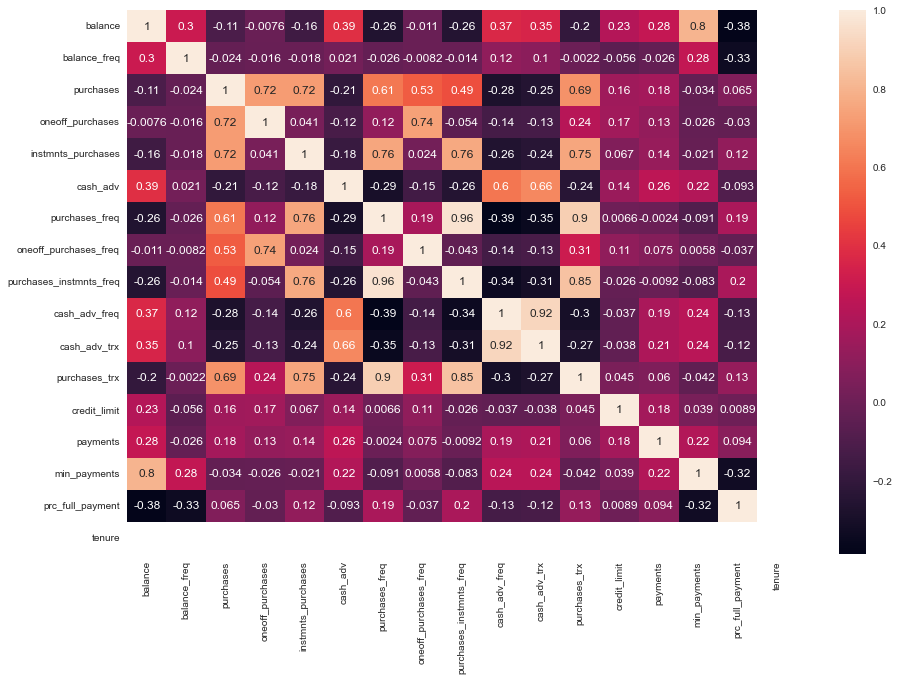

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

Berdasarkan plot heatmap setelah dilakukan remove outliers, ada kumpulan kolom yang saling memiliki korelasi tinggi yaitu balance, purchases, oneoff_purchases, instmnts_purchases, cash_adv, purchases_freq, oneoff_purchases_freq, purchases_instmnts_freq, cash_adv_freq, cash_adv_trx, purchases_trx, payments, min_payments, dan prc_full_payment.
Sedangkan pada kolom tenure bahkan tidak terdapat korelasi karena nilainya tetap pada semua baris karena data outliersnya dihapus.

# Pre-Processing Data

Sebelum dilakukan analisis lebih lanjut, perlu dilakukan standarisasi data menggunakan fungsi `StandardScaler()`. Data yang telah distandarisasi kemudian disimpan dalam dataframe bernama `df_scaled`.

In [35]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-1.21268254, -2.67260771, -0.52867892, ..., -1.0064726 ,
        -0.37279831,  0.        ],
       [-0.30229682,  0.31913991, -0.77534091, ..., -0.61390034,
        -0.37279831,  0.        ],
       [ 0.87661144,  0.31913991,  0.5300416 , ...,  0.4571671 ,
        -0.37279831,  0.        ],
       ...,
       [-0.78316475,  0.31913991, -0.8250461 , ..., -0.67419096,
        -0.37279831,  0.        ],
       [-1.1586261 ,  0.31913991,  1.05604676, ..., -0.87408973,
        -0.37279831,  0.        ],
       [-0.90067813,  0.31913991,  1.99976189, ..., -0.85825778,
        -0.37279831,  0.        ]])

Data yang telah distandarisasi kemudian disimpan kedalam bentuk dataframe dengan nama `df_final`.

In [36]:
df_final = pd.DataFrame(df_scaled,columns=df.columns)
df_final

,balance,balance_freq,purchases,oneoff_purchases,instmnts_purchases,cash_adv,purchases_freq,oneoff_purchases_freq,purchases_instmnts_freq,cash_adv_freq,cash_adv_trx,purchases_trx,credit_limit,payments,min_payments,prc_full_payment,tenure
0,-1.212683,-2.672608,-0.528679,-0.533366,-0.229438,-0.613065,-0.486029,-0.652539,-0.527223,-0.819880,-0.786551,-0.554999,-0.923665,-1.034867,-1.006473,-0.372798,0.0
1,-0.302297,0.319140,-0.775341,-0.461806,-0.657651,-0.613065,-0.715693,0.094837,-0.754720,-0.819880,-0.786551,-0.700383,-0.806671,0.231527,-0.613900,-0.372798,0.0
2,0.876611,0.319140,0.530042,-0.533366,1.300280,-0.613065,1.810596,-0.652539,1.975244,-0.819880,-0.786551,0.898833,-0.163203,0.233468,0.457167,-0.372798,0.0
3,-0.071174,0.319140,1.851237,2.425156,0.240070,-0.613065,-0.026706,0.094837,-0.072229,-0.819880,-0.786551,-0.118850,2.586157,0.257953,-0.363430,-0.372798,0.0
4,1.988931,0.319140,-0.825046,-0.533366,-0.657651,0.005149,-0.945355,-0.652539,-0.754720,-0.090363,-0.273086,-0.845766,0.246276,0.569864,2.164687,-0.372798,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,-1.214838,0.319140,0.097669,-0.533366,0.675555,-0.613065,1.580934,-0.652539,1.747748,-0.819880,-0.786551,0.753450,-0.923665,-0.781002,-0.829518,-0.372798,0.0
1974,1.660423,0.319140,-0.825046,-0.533366,-0.657651,4.067316,-0.945355,-0.652539,-0.754720,1.368679,2.807700,-0.845766,0.246276,0.079423,2.475200,-0.372798,0.0
1975,-0.783165,0.319140,-0.825046,-0.533366,-0.657651,1.818901,-0.945355,-0.652539,-0.754720,0.639163,0.240378,-0.845766,-0.631179,-1.309409,-0.674191,-0.372798,0.0
1976,-1.158626,0.319140,1.056047,-0.533366,2.060291,-0.613065,1.810596,-0.652539,1.747748,-0.819880,-0.786551,0.898833,-0.631179,-0.211474,-0.874090,-0.372798,0.0


# Pendefinisian model

Sebelum memulai pendefinisian model, jumlah dari cluster (n_clusters) harus ditentukan terlebih dahulu. Penentuan jumlah cluster dapat dilakukan dengan beberapa cara seperti *Elbow Curve Method* atau dapat juga menggunakan menggunakan *Silhouette Analysis*.

## Elbow Curve Method

Metode Elbow merupakan metode yang digunakan untuk menentukan jumlah cluster optimal dengan cara melihat presentase hasil perbandingan antara jumlah cluster yang akan membentuk siku pada suatu titik.

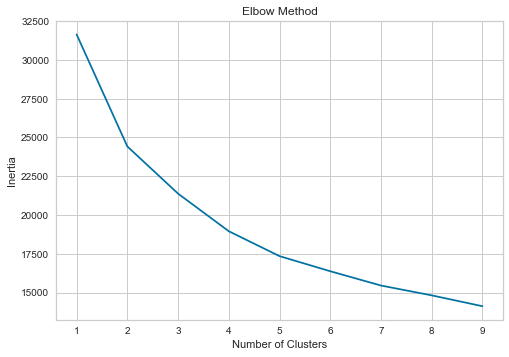

In [37]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}

inertia = []
for i in range (1,10):
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs)
    kmeans.fit(df_final)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10),inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Berdasarkan plot di atas, dapat diketahui bahwa penurunan nilai secara drastis terjadi pada titik 4.  Untuk dapat memastikan apakah jumlah cluster yang optimal bernilai 4, dapat dibuktikan menggunakan `KElbowVisualizer` yang terdapat pada library `yellowbrick`.

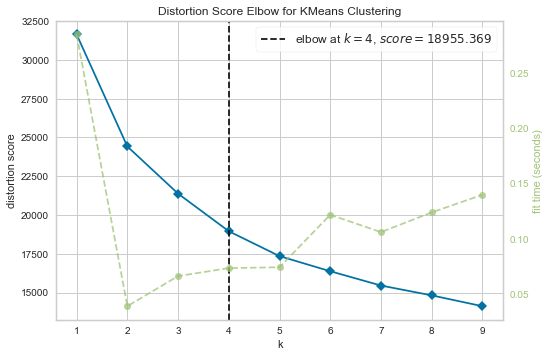

In [38]:
elbow_visualizer = KElbowVisualizer(kmeans, metrics='silhouette', k =(1,10))
elbow_visualizer.fit(df_final)
elbow_visualizer.poof()
plt.show()

Berdasarkan plot `KElbowVisualizer` yang terdapat pada library `yellowbrick`, dapat diketahui bahwa jumlah cluster yang optimal adalah 4.

## Silhouette Analysis

Selain menggunakan *Elbow Curve Method*, penentuan jumlah cluster yang optimal dapat dilakukan menggunakan metode *Silhouette Analysis*.

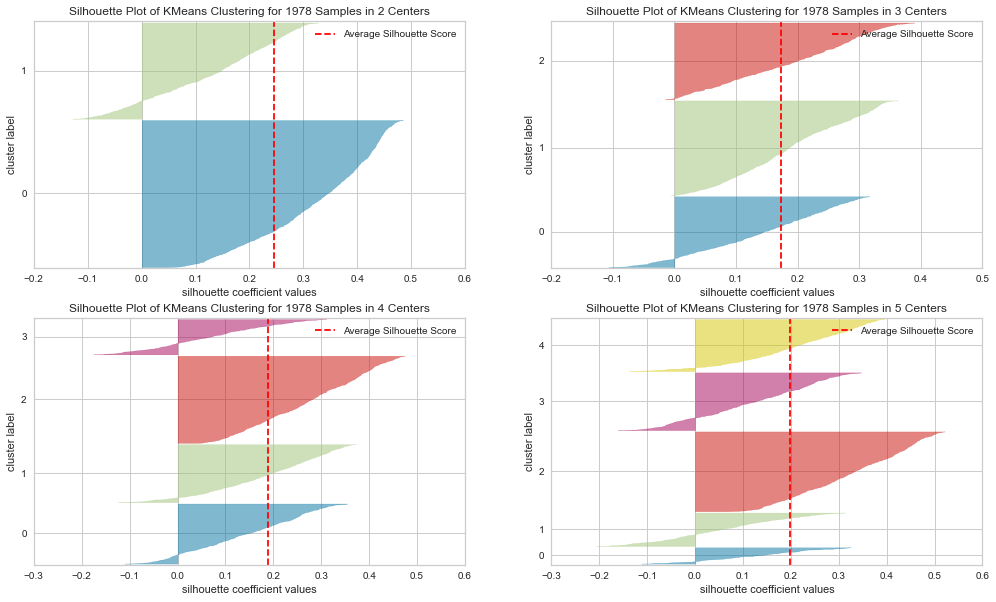

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(17,10))
axli = ax.flatten()

kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}

j = 0
for i in [2,3,4,5]:
    km = KMeans(n_clusters=i, **kmeans_kwargs)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=   axli[j] )
    visualizer.fit(df_final)
    visualizer.finalize()
    j+=1

Berdasarkan visualisasi menggunakan metode *Silhouette Analysis*, jumlah cluster yang optimal adalah 3. Hal ini dapat diketahui dari silhouette score pada masing-masing cluster bernilai lebih dari rata-rata silhouette score. Selain itu, ketebalan/tinggi plot pada masing-masing cluster cenderung sama.

Setelah diketahui jumlah cluster yang optimal, maka model K-Means dapat didefinisikan menggunakan parameter yang disesuaikan.

In [40]:
kmeans_model = KMeans(n_clusters=4, n_init=10, init='k-means++',
                      max_iter=300, random_state=42)

# Pelatihan Model

Setelah dilakukan pendefinisian model langkah selanjutnya adalah pelatihan model. Pelatihan model dilakukan menggunakan fungsi `.fit` pada data yang telah dibersihkan dan di-scalling bernama `df_final`.

In [41]:
kmeans_model.fit(df_final)

KMeans(n_clusters=4, random_state=42)

Pengecekan ukuran dimensi dari center setiap clusters dapat dilakukan menggunakan fungsi `.cluster_centers_.shape`.

In [42]:
kmeans_model.cluster_centers_.shape

(4, 17)

Diketahui bahwa shape dari cluster adalah 3 baris dan 17 kolom.

# Evaluasi Model

In [43]:
# pendefinisian PCA
pca_2 = PCA(2)

Dberikan nilai input 2 karena ingin dilakukan pengurangan dimensi data menjadi 2 kolom saja yang mana akan digunakan untuk membangun scatter plot untuk memvisualisasikan hasil clustering yang dilakukan oleh model.

In [44]:
# dilakukan PCA untuk data feature
pca_2_result = pca_2.fit_transform(df_final)

Menggunakan PCA, dilakukan pengurangan feature dari 17 kolom menjadi 2 kolom dimana 2 kolom tersebut akan mewakili data awal(17 kolom).

In [45]:
# Dilakukan PCA untuk data centroids cluster
centroids = kmeans_model.cluster_centers_
centroids_pca = pca_2.fit_transform(centroids)

PCA juga diterapkan pada data centroids atau center dari cluster yang telah dibangun oleh model. Setiap baris data centroids memuat nilai dari masing-masing kolom feature(17 kolom) dimana nilai-nilai tersebut menunjukkan posisi centroids untuk cluster tersebut. Setelah dilakukan PCA, kolom yang menunjukkan titik koordinat centroids berkurang dari 17 kolom menjadi 2 kolom dimana dua kolom tersebut mewakili 17 kolom sebelumnya. 2 kolom tersebut akan digunakan untuk menunjukkan titik koordinat sentroid suatu cluster saat divisualisasikan dengan scatter plot.

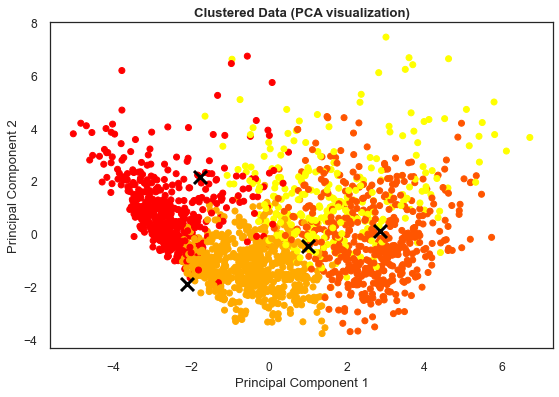

In [46]:
# Dibangun Scatter Plot
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=kmeans_model.labels_, cmap='autumn')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10,lw=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()

Kemudian dibangun Scatter Plot dimana sumbu X digunakan untuk merepresentasikan nilai/data dari kolom pertama hasil PCA, sedangkan sumbu Y untuk merepresentasikan nilai/data dari kolom kedua hasil PCA. Lambang X merupakan representasi dari 4 centroids untuk masing-masing cluster(0,1,2,3). Dari visualisasi di atas, bisa dilihat bahwa model masih kurang baik dalam melakukan pengelompokan data nasabah serta dapat ditemukan beberapa bagian yang overlapping antar cluster.

## Silhouette Coefficient

Silhouette Coefficient merupakan sebuah evaluation metrics dimana akan memberikan nilai output dalam rentang -1 sampai 1. Jika nilai yang muncul mendekati 1, itu menandakan bahwa data points untuk masing-masing cluster yang telah dibuat memiliki posisi yang sangat dekat(sangat mirip) sehingga jauh dari cluster lainnya. Jika score mendekati -1, hal itu menandakan sebaliknya. Sedangkan output score yang dekat dengan nol menandakan adanya overlapping clusters. Perhitungan dilakukan dengan menggunakan nilai dari mean intra-cluster distance(jarak suatu sample dengan clusternya) dan mean nearest-cluster distance(jarak suatu sampel dengan cluster terdekat).

In [47]:
# Evaluasi model dengan metrics pertama
ss = silhouette_score(df_final, kmeans_model.labels_)
print(ss)

0.18801119358958102


untuk fungsi `silhouette_score()`, input yang diterima adalah data feature yang digunakan untuk melatih model dan data label/cluster yang telah dibuat oleh model untuk mengelompokkan data. Dari perhitungan menggunakan silhouette score, didapatlah hasil sebesar 0.1880. Bisa dilihat bahwa nilai output tersebut mendekati 0, yang artinya terdapat cluster yang overlapping.

## Davies-Bouldin Index

Davies-Bouldin Index merupakan sebuah evaluation metrics dimana akan memberikan nilai output paling minimal adalah 0. Jika nilai output dari hasil perhitungan semakin mendekati 0, maka semakin baik pula proses clustering atau pengelompokan yang telah dilakukan oleh model. Evaluation metric yang satu ini mengevaluasi model dengan menghitung rata-rata kemiripan dari masing-masing cluster dengan cluster lain yang paling mirip dengannya. Sehingga, cluster-cluster yang terpisah jauh dengan penyebaran data point di masing-masing cluster yang lebih rendah akan menghasilkan nilai yang lebih tinggi.

In [48]:
# Evaluasi model dengan metrics kedua
dbs = davies_bouldin_score(df_final, kmeans_model.labels_)
print(dbs)

1.6806645327669747


untuk fungsi `davies_bouldin_score()`, input yang diterima adalah data feature yang digunakan untuk melatih model dan data label/cluster yang telah dibuat oleh model untuk mengelompokkan data. Dari perhitungan menggunakan Davies-Bouldin Index, didapatlah hasil sebesar 1.6807. Bisa dilihat bahwa nilai output tersebut jauh dari 0, yang artinya proses clustering yang dilakukan oleh model masih belum cukup baik.

# Kesimpulan

>**Dari Hasil Analisis di atas dapat ditarik kesimpulan sebagai berikut:**

>+ Dari hasil analisis feature selection, didapatlah 17 kolom atau feature yang akan digunakan untuk melatih model clustering ini. Kolom-kolom tersebut adalah balance, balance_freq, purchases, oneoff_purchases, instmnts_purchases, cash_adv, purchases_freq, oneoff_purchases_freq, purchases_instmnts_freq, cash_adv_freq, cash_adv_trx, purchases_trx, credit_limit, payments, min_payments, prc_full_payment, dan tenure. Feature-feature tersebut dianggap merupakan yang terbaik untuk membangun model clustering yang mana akan berguna pada saat membuat strategi pemasaran kartu kredit yang efektif dan efisien.

>+ Dari Scatter plot pertama, dilihat korelasi antara 3 feature yaitu Payment, Purchases dan Credit Limit. Kemudian, dapat ditarik kesimpulan bahwa ketiganya saling mempengaruhi satu sama lain dimana dapat dilihat bahwa semakin tinggi purchases(pembelian yang dilakukan) maka akan semakin tinggi payments(pembayaran) yang mana akan menaikkan credit limit dari nasabah tersebut.

>+ Dari diagnostic plot diketahui bahwa hampir semua feature yang telah dipilih memiliki data outlier di dalamnya. Namun, terdapat 2 feature yang tidak memiliki outlier yaitu purchases_freq dan purchases_instmnts_freq. Selain itu, ditarik kesimpulan bahwa kolum dengan persebaran data yang normal adalah purchases_freq dan purchases_instmnts_freq, feature dengan positive skewness adalah balance, purchases, oneoff_purchases, instmnts_purchases, cash_adv, oneoff_purchases_freq, cash_adv_freq, cash_adv_trx, purchases_trx, credit_limit, payments dan min_payments, serta feature dengan negative skewness adalah balance_freq dan tenure.

>+ Berdasarkan Correlation Heatmap Plot, feature yang berkorelasi paling tinggi adalah oneoff_puchases dengan purchases kemudian diikuti oleh purchases_instmnts_freq dengan purchases_freq. Hal ini berarti perubahan nilai baik kenaikan maupun penurunan dari satu kolom beriringan dengan perubahan nilai dari kolom lainnya.

>+ Pembangunan model klasterisasi ini dilakukan dengan menggunakan algoritma K-Means dimana algoritma ini akan membangun cluster sebanyak K, kemudian proses pengelompokkan akan didasarkan pada perhitungan jarak antara data point dengan sentroid atau titik tengah suatu cluster. Pemilihan sentroid dari cluster-cluster tersebut akan dilakukan secara berulang sampai didapatkan posisi sentroid yang paling optimal. Dari beberapa percobaan, dipilih 4 sebagai jumlah cluster terbaik.

>+ Terdapat 2 evaluation metrics yang digunakan untuk mengevaluasi model ini, yaitu Silhouette Coefficient dan Davies-Bouldin Index. Silhouette Coefficient mengevaluasi model clustering berdasarkan kedekatan atau kepadatan posisi data points dari suatu masing-masing cluster sedangkan Davies-Bouldin Index melakukan evaluasi berdasarkan perhitungan kemiripan antar cluster. Menggunakan Silhouette Coefficient didapatkan nilai output sebesar 0.1880 sedangkan menggunakan Davies-Bouldin Index didapatkan nilai output sebesar 1.6807.